In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import scipy.stats as stats

In [26]:
# df = pd.DataFrame(data, index=date_range)
# df.to_csv('data.csv', index=False)

df = pd.read_csv("/home/kevinpnjt/skripsi/code_arima/ARIMA_PROJEK/data.csv",index_col =False)

In [27]:
df

,Tanggal,IHK,Makanan dan minuman tidak beralkohol,Minuman beralkohol dan tembakau,Pakaian dan alas kaki,"Perumahan, air, listrik, gas, dan bahan bakar lainnya","Furnitur, perlengkapan rumah tangga, dan perbaikan rutin rumah",Kesehatan,Transportasi,Komunikasi,Rekreasi dan kebudayaan,Pendidikan,Penyediaan makan minum dan akomodasi,Barang dan jasa lainnya
0,2012/01,98.39,100.61,96.51,99.62,96.07,99.31,98.79,96.11,100.00,101.05,99.44,99.33,100.65
1,2012/02,97.12,96.67,96.78,100.48,96.96,99.42,98.79,96.52,100.00,102.43,99.44,99.58,101.20
2,2012/03,97.62,96.84,97.40,101.30,98.85,100.45,98.85,96.56,100.00,102.48,99.44,99.58,101.23
3,2012/04,97.67,96.84,97.63,101.32,99.01,100.39,98.85,96.73,100.00,102.87,99.69,99.61,101.23
4,2012/05,98.36,98.23,98.59,100.91,99.25,100.87,98.85,97.14,100.00,102.53,99.69,99.74,101.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2024/05,157.85,168.55,238.47,123.35,153.16,144.34,133.43,183.15,106.77,147.58,138.68,150.13,174.14
149,2024/06,157.64,167.46,238.51,123.34,153.10,144.33,133.31,183.25,106.77,147.64,138.68,150.57,172.86
150,2024/07,156.35,161.73,240.98,123.62,153.28,144.41,133.49,183.47,106.72,147.72,139.00,150.59,166.95
151,2024/08,156.33,160.86,242.00,123.61,153.57,144.47,133.61,183.85,106.23,148.23,139.67,151.06,166.00


In [45]:
from scipy.stats import jarque_bera

stat, p = jarque_bera(df['IHK'])
print(f'Jarque-Bera Test: Statistik={stat}, p-value={p}')

if p > 0.05:
    print("Data kemungkinan berdistribusi normal.")
else:
    print("Data kemungkinan tidak berdistribusi normal.")


Jarque-Bera Test: Statistik=5.26718026121057, p-value=0.07182015510112519
Data kemungkinan berdistribusi normal.


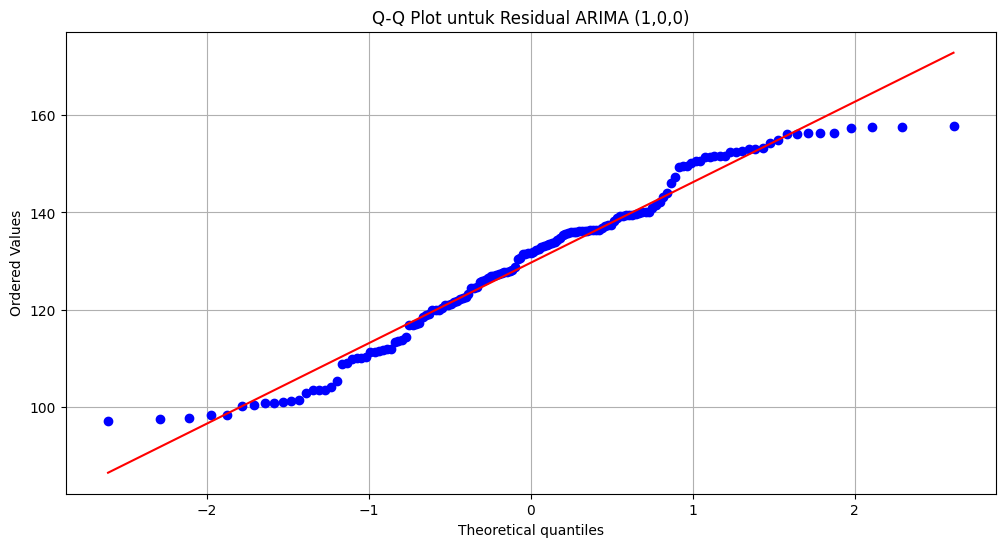

In [44]:

plt.figure(figsize=(12, 6))
stats.probplot(df['IHK'], dist="norm", plot=plt)
plt.title('Q-Q Plot untuk Residual ARIMA (1,0,0)')
plt.savefig('plot-qq-plot residual.png', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


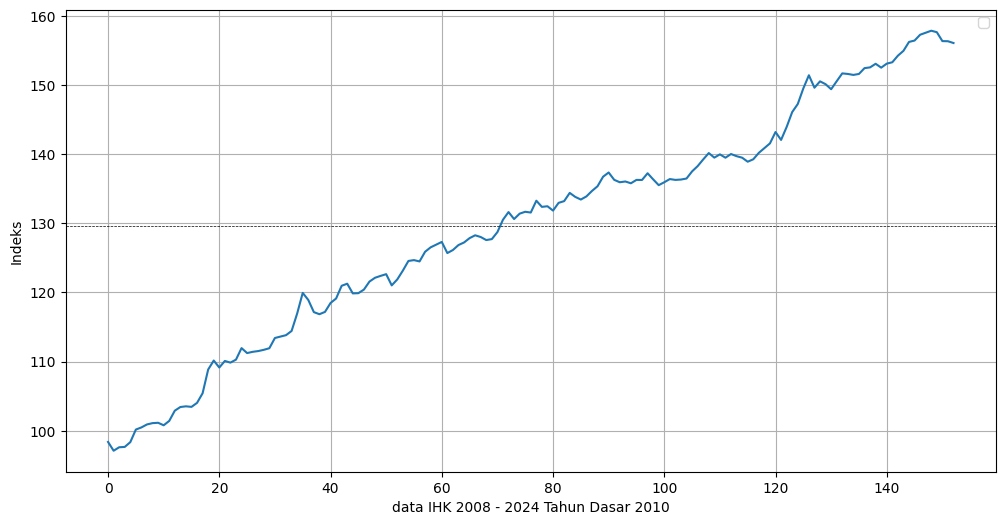

In [28]:
# df['Rolling_Mean'] = df['IHK'].rolling(window=3).mean() ##
# plt.plot(df['Rolling_Mean'])
plt.figure(figsize=(12, 6))
plt.plot(df.index,df['IHK'])
plt.axhline(df['IHK'].mean(), color='black', linewidth=0.5, linestyle='--')
plt.xlabel("data IHK 2008 - 2024 Tahun Dasar 2010")
plt.savefig('plot_IHK.png', dpi=300, bbox_inches='tight')
plt.ylabel("Indeks")
plt.legend()
plt.grid()
plt.show()

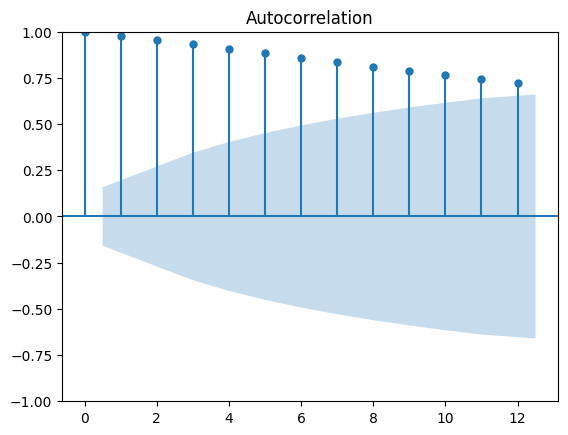

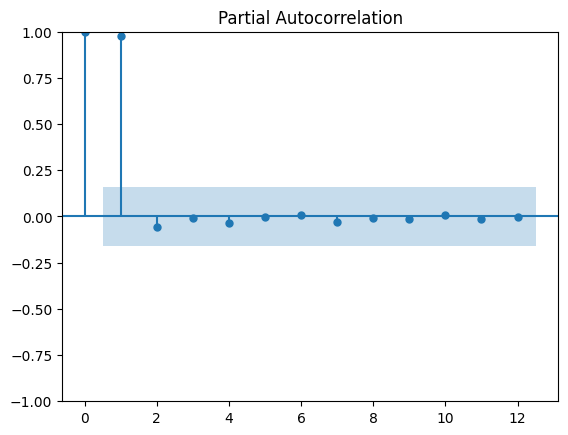

In [29]:
# Menggambarkan ACF dan PACF untuk menentukan parameter
plot_acf(df['IHK'], lags=12)
plt.savefig('plot_acfdata.png', dpi=300, bbox_inches='tight')
plot_pacf(df['IHK'], lags=12)
plt.savefig('plot_pacf-data.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
data = df['IHK']

# Lakukan uji ADF
result = adfuller(data, maxlag=12)
# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.57280140895491
p-value: 0.49724023289549146
Critical Values:
   1%: -3.4753253063120644
   5%: -2.881274703275226
   10%: -2.5772928360116873


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


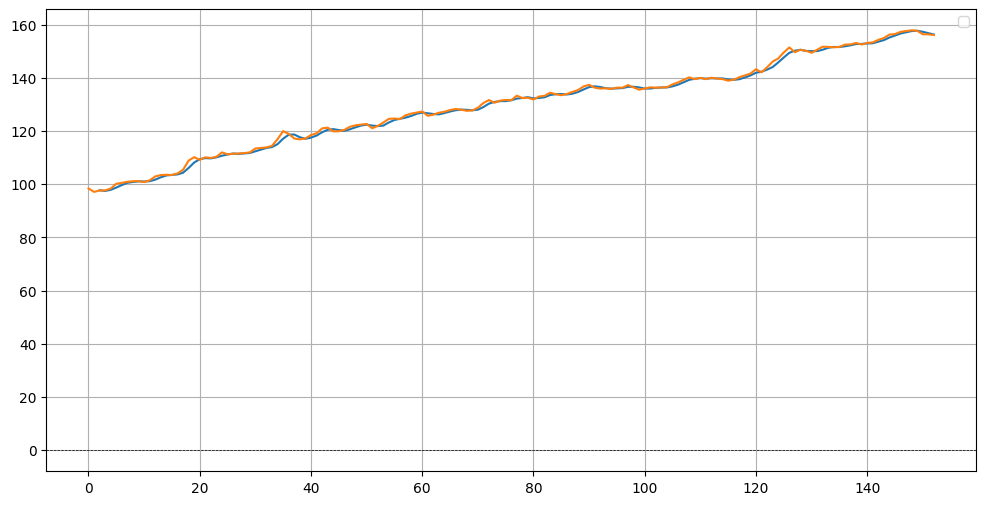

In [31]:
df['Rolling_Mean'] = df['IHK'].rolling(window=3).mean() ##
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling_Mean'])
plt.plot(df.index,df['IHK'])
plt.savefig('plot_IHK.png', dpi=300, bbox_inches='tight')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


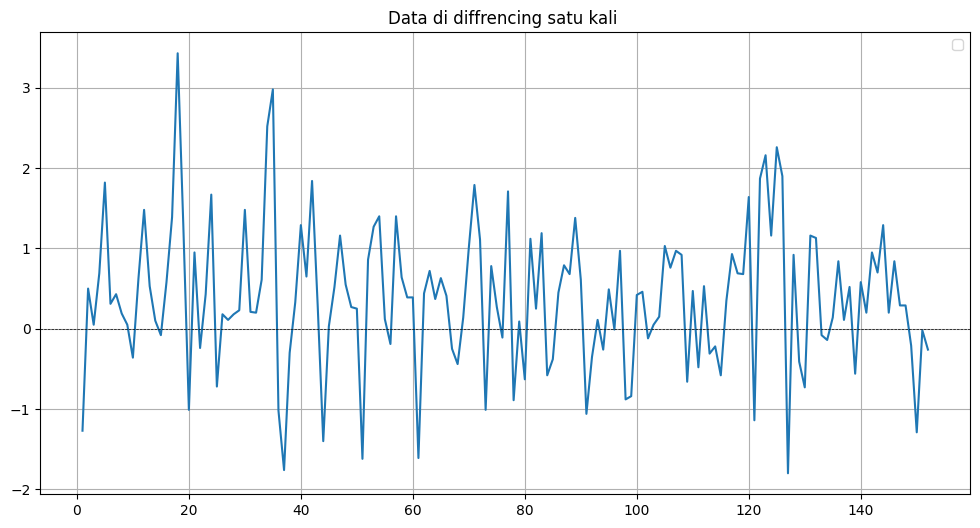

In [32]:
# Menghitung rolling mean dengan jendela 7
plt.figure(figsize=(12, 6))
plt.plot(df.index,df['IHK'].diff())
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title("Data di diffrencing satu kali ")
plt.savefig('plot_IHK_diff1.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

<Figure size 2400x1200 with 0 Axes>

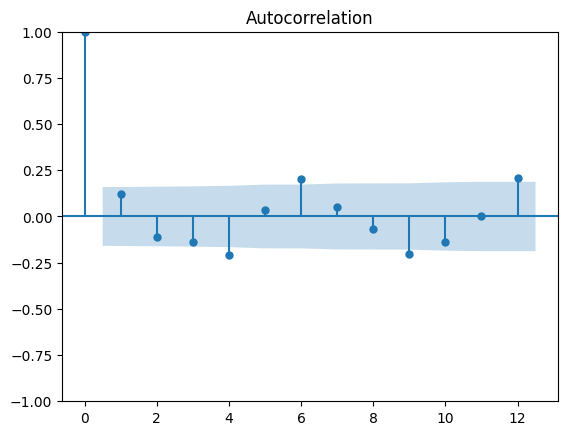

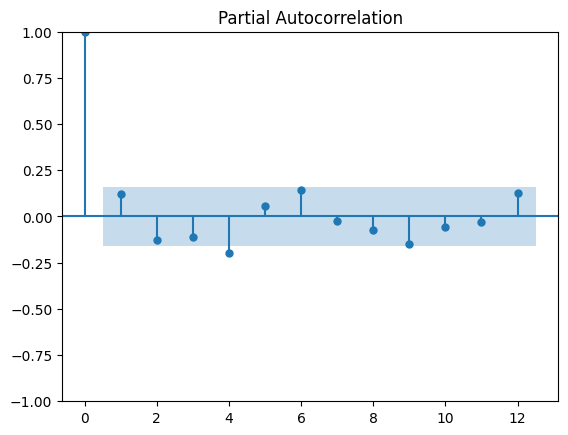

In [33]:
# Menggambarkan ACF dan PACF untuk menentukan parameter
plt.figure(figsize=(24, 12))
plot_acf(df['IHK'].diff().dropna(), lags=12)
plt.savefig('plot_IHK.acf_diff1.png', dpi=300, bbox_inches='tight')
plot_pacf(df['IHK'].diff().dropna(), lags=12)
plt.savefig('plot_IHK.pacf_diff1.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
data = df['IHK'].diff().dropna()

# Lakukan uji ADF
result = adfuller(data, maxlag=12)
# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -8.174768548372818
p-value: 8.434868858723797e-13
Critical Values:
   1%: -3.4753253063120644
   5%: -2.881274703275226
   10%: -2.5772928360116873


                               SARIMAX Results                                
Dep. Variable:                    IHK   No. Observations:                  122
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -160.462
Date:                Fri, 28 Feb 2025   AIC                            330.924
Time:                        11:37:00   BIC                            344.903
Sample:                             0   HQIC                           336.602
                                - 122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3002      0.086      3.504      0.000       0.132       0.468
ma.L2          0.0375      0.095      0.393      0.694      -0.149       0.224
ma.L3         -0.0110      0.095     -0.116      0.9

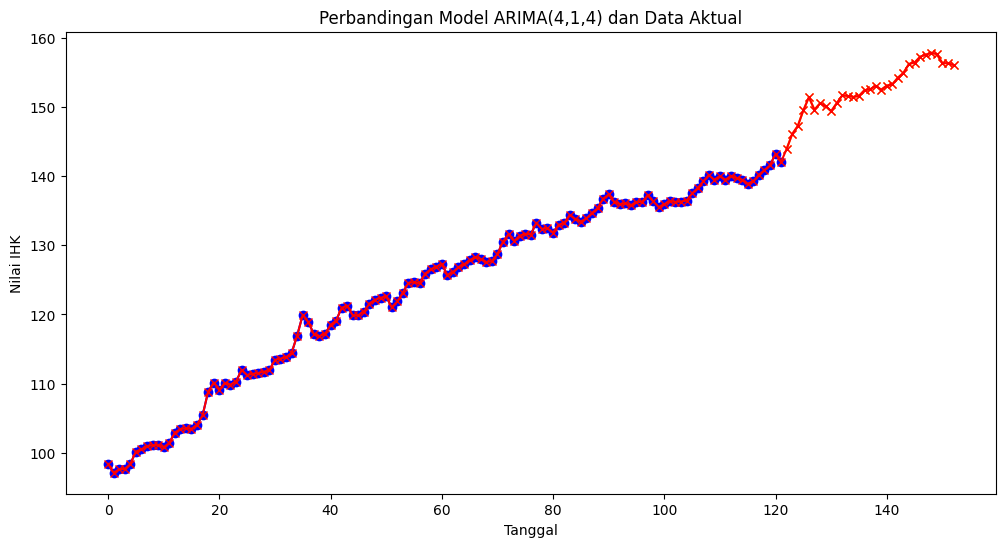

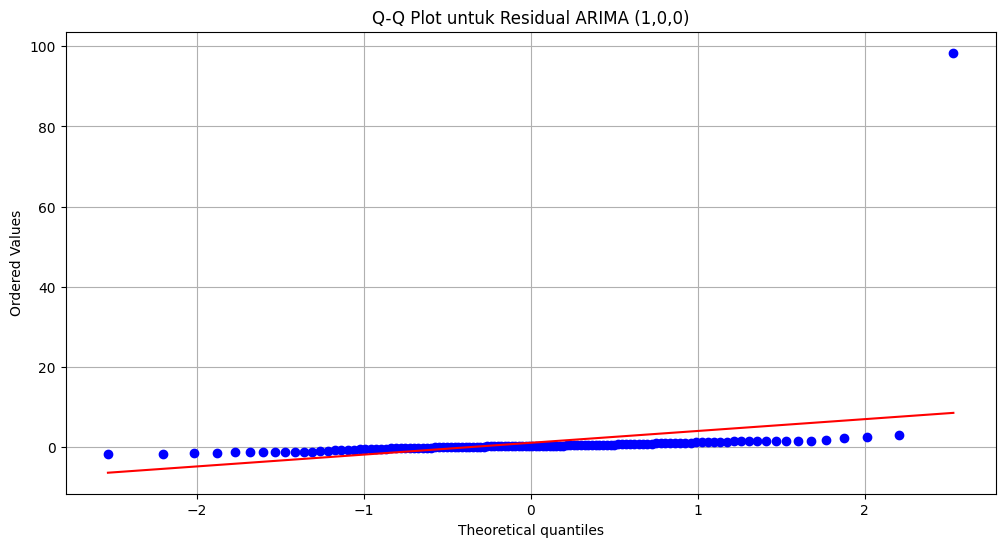

In [58]:
# Memisahkan data menjadi 80% pelatihan dan 20% pengujian
train_size = int(len(df)*0.8 )
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit model pada data pelatihan
model = ARIMA(train['IHK'], order=(0, 1, 4))
model_fit = model.fit()
residuals = model_fit.resid
# Melakukan prediksi untuk periode pengujian
n_forecast = len(test)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean

# # Menampilkan hasil prediksi
# print("Prediksi IHK:")
# print(forecast_values)
print(model_fit.summary())
#Plot hasil
index = range(122, len(forecast_values) + 122)
plt.figure(figsize=(12, 6))
# plt.plot(train.index, train['IHK'], label='Data Pelatihan', color='blue')
plt.plot(train['IHK'], label='Data Pengujian (Aktual)', color='blue', marker='o')
plt.plot(test['IHK'], label='Prediksi ARIMA(5,2,1)', color='orange', marker='x')
plt.plot(df['IHK'], label='Prediksi ARIMA(5,2,1)', color='red', marker='x')
plt.title('Perbandingan Model ARIMA(4,1,4) dan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai IHK')
# plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
# plt.legend()
# plt.savefig('plot_model_arima', dpi=300, bbox_inches='tight')
# plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot untuk Residual ARIMA (1,0,0)')
plt.savefig('plot-qq-plot residual.png', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

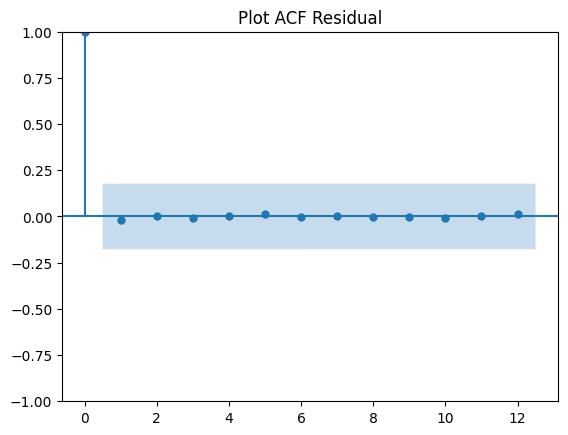

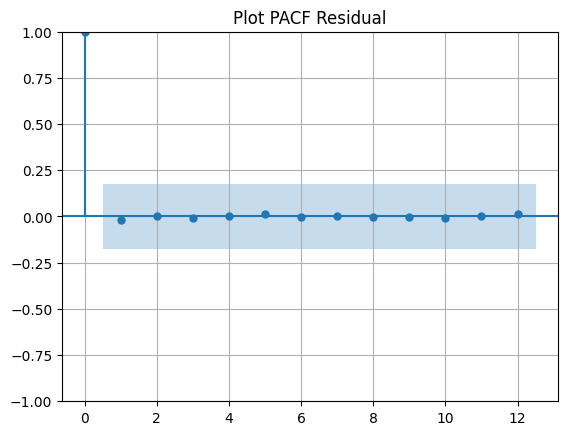

In [49]:
# Membuat plot Autokorelasi dari residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=12)  
plt.title('Plot ACF Residual')
plt.savefig('plot_acf-residual.png', dpi=300, bbox_inches='tight')
plot_pacf(residuals, lags=12)  
plt.title('Plot PACF Residual')
plt.savefig('plot_pacf-residual.png', dpi=300, bbox_inches='tight')
plt.grid(True)

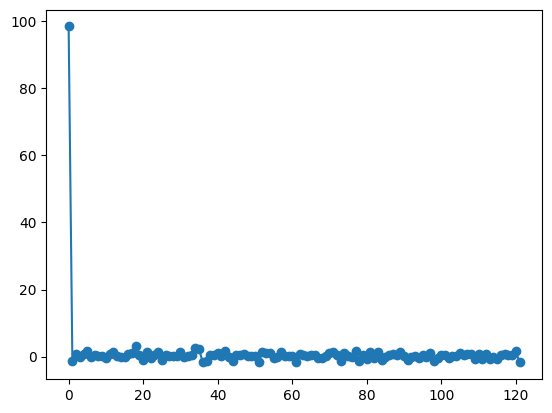

In [50]:

plt.plot(residuals,marker = 'o')

In [52]:
from sklearn.metrics import mean_absolute_percentage_error
#Menghitung error (MAE) pada data pengujian
mape = mean_absolute_percentage_error(forecast_values,test['IHK'])
print(f'Mean Absolute Error (Mape) pada data pengujian: {mape}')

Mean Absolute Error (Mape) pada data pengujian: 0.07889590062486515


In [53]:
from sklearn.metrics import mean_squared_error

# Hitung MSE
mse = mean_squared_error(test['IHK'], forecast_values)
print('Train Score: %.2f MSE' % mse)
rmse = np.sqrt(mse)

print('Train Score: %.2f RMSE' % rmse)

Train Score: 136.61 MSE
Train Score: 11.69 RMSE


In [54]:
# Prediksi untuk 12 bulan ke depan
forecast_steps = 100  # prediksi 12 bulan ke depan
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Menampilkan hasil prediksi untuk 12 bulan ke depan
print("Prediksi IHK untuk 12 bulan ke depan:")
print(forecast_values)

Prediksi IHK untuk 12 bulan ke depan:
122    141.605325
123    141.485264
124    141.353836
125    141.502423
126    141.502423
          ...    
217    141.502423
218    141.502423
219    141.502423
220    141.502423
221    141.502423
Name: predicted_mean, Length: 100, dtype: float64
